In [12]:
# Import necessary libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from alpaca_trade_api import REST
from datetime import datetime, timedelta
import pytz

# Load environment variables from .env file
load_dotenv(dotenv_path='APCA.env')  # Ensure this matches the location of your .env file

# Define monthly income
monthly_income = 12000

# ---- Evaluate Cryptocurrency Wallet ----
# Define cryptocurrency amounts
btc_amount = 1.2
eth_amount = 5.3

# Fetch current cryptocurrency prices using CoinGecko API
btc_url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'
eth_url = 'https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd'

btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()

btc_price = btc_response['bitcoin']['usd']
eth_price = eth_response['ethereum']['usd']

# Calculate total cryptocurrency wallet value
btc_value = btc_price * btc_amount
eth_value = eth_price * eth_amount
total_crypto_value = btc_value + eth_value

# ---- Evaluate Stock and Bond Holdings ----
# Set Alpaca API key and secret from .env file
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_api_endpoint = os.getenv('ALPACA_API_ENDPOINT')

# Initialize Alpaca REST API
api = REST(alpaca_api_key, alpaca_secret_key, base_url=alpaca_api_endpoint, api_version='v2')

# Define stock and bond amounts
spy_shares = 110
agg_shares = 200

# Use the datetime module to get the previous business day
today = datetime.now(pytz.timezone('America/New_York'))
start_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
end_date = start_date  # Same as start_date for the most-recent trading day

# Fetch closing prices for SPY (stocks) and AGG (bonds) using Alpaca API
tickers = ["SPY", "AGG"]
timeframe = '1D'
portfolio_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Calculate total value of stock and bond portfolio
spy_close_price = portfolio_df[portfolio_df['symbol']=='SPY']['close'].iloc[0]
agg_close_price = portfolio_df[portfolio_df['symbol']=='AGG']['close'].iloc[0]
spy_value = spy_close_price * spy_shares
agg_value = agg_close_price * agg_shares
total_stock_bond_value = spy_value + agg_value

# ---- Evaluate the Emergency Fund ----
# Create a DataFrame for the savings data
savings_data = {'amount': [total_crypto_value, total_stock_bond_value]}
savings_df = pd.DataFrame(savings_data, index=['crypto', 'stock/bond'])

# Plot a pie chart of the savings
savings_df.plot.pie(y='amount', title='Portfolio Composition')

# Determine if there is enough money in the fund for an emergency
emergency_fund_value = monthly_income * 3
total_portfolio_value = total_crypto_value + total_stock_bond_value

# Displaying Portfolio values
print(f"Total Cryptocurrency Portfolio Value: ${total_crypto_value:,.2f}")
print(f"Total Stock and Bond Portfolio Value: ${total_stock_bond_value:,.2f}")
print(f"Total Portfolio Value: ${total_portfolio_value:,.2f}")

if total_portfolio_value > emergency_fund_value:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio_value == emergency_fund_value:
    print("Congratulations on reaching this important financial goal.")
else:
    shortfall = emergency_fund_value - total_portfolio_value
    print(f"You are ${shortfall} away from reaching the goal.")


KeyError: 'bitcoin'

In [7]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
from alpaca_trade_api import REST
from dotenv import load_dotenv
# Import your Monte Carlo simulation library here

# Load environment variables
load_dotenv(dotenv_path='APCA.env')

# Alpaca API authentication
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
alpaca_api_endpoint = os.getenv('ALPACA_API_ENDPOINT')

api = REST(alpaca_api_key, alpaca_secret_key, base_url=alpaca_api_endpoint)

# Define the investment portfolio
tickers = ["SPY", "AGG"]
weights = [0.6, 0.4]  # 60/40 stocks to bonds ratio
timeframe = "1D"

# Configure the timeframe of historical data
start_date = pd.Timestamp(datetime.now() - pd.DateOffset(years=3), tz='America/New_York').isoformat()
end_date = pd.Timestamp(datetime.now(), tz='America/New_York').isoformat()

# Fetch historical data for SPY and AGG
portfolio_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Assuming the fetched data needs to be restructured similar to examples given, focus on closing prices
portfolio_close_prices = portfolio_df[['close']].pivot_table(index=portfolio_df.index, columns=portfolio_df['symbol'], values='close')

# Display sample data
print(portfolio_close_prices.head())

# Preview DataFrame
display(portfolio_close_prices.head())

# Save the DataFrame to a CSV file
portfolio_close_prices.to_csv('portfolio_close_prices.csv', index=False)

print("Portfolio close prices have been saved to 'portfolio_close_prices.csv'")

symbol                        AGG     SPY
timestamp                                
2021-02-23 05:00:00+00:00  115.51  387.52
2021-02-24 05:00:00+00:00  115.47  391.84
2021-02-25 05:00:00+00:00  114.41  382.37
2021-02-26 05:00:00+00:00  115.34  380.01
2021-03-01 05:00:00+00:00  115.09  389.43


symbol,AGG,SPY
timestamp,,
2021-02-23 05:00:00+00:00,115.51,387.52
2021-02-24 05:00:00+00:00,115.47,391.84
2021-02-25 05:00:00+00:00,114.41,382.37
2021-02-26 05:00:00+00:00,115.34,380.01
2021-03-01 05:00:00+00:00,115.09,389.43


Portfolio close prices have been saved to 'portfolio_close_prices.csv'


symbol                          AGG       SPY
timestamp                                    
2021-02-24 05:00:00+00:00 -0.000346  0.011148
2021-02-25 05:00:00+00:00 -0.009180 -0.024168
2021-02-26 05:00:00+00:00  0.008129 -0.006172
2021-03-01 05:00:00+00:00 -0.002168  0.024789
2021-03-02 05:00:00+00:00  0.000174 -0.007370
            0             1             2             3             4    \
0  19815.036190  20038.243357  20066.727423  20144.087383  19974.560488   
1  19943.236849  20026.257065  20168.623886  20074.517432  19909.139919   
2  19954.349036  20209.779807  20213.938246  20024.615470  19922.819577   
3  20019.188030  20201.988159  20298.182597  20119.496480  19952.040343   
4  20078.850077  20238.756784  20316.835307  20071.945478  19944.742841   

            5             6             7             8             9    ...  \
0  20048.711038  19924.789698  20021.672380  19885.205278  20012.209935  ...   
1  19927.737014  20141.632597  20057.287289  19939.992995  20003.12

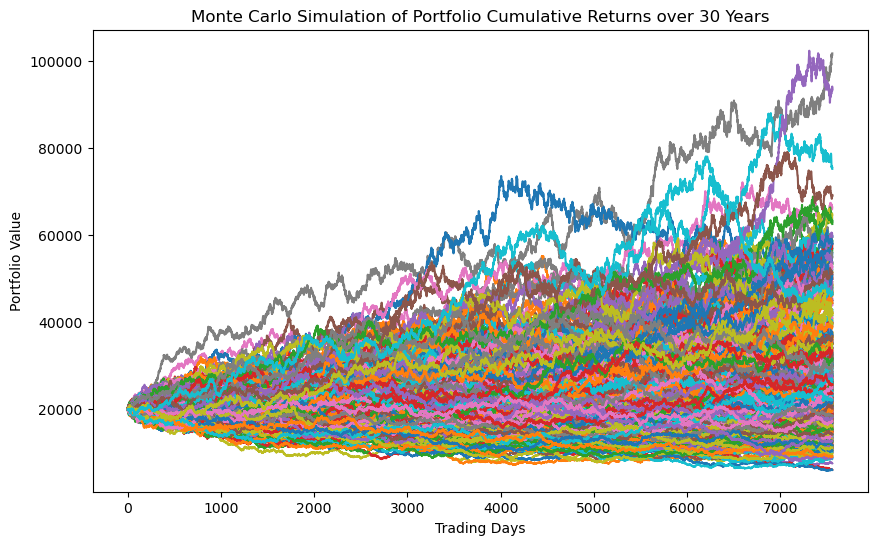

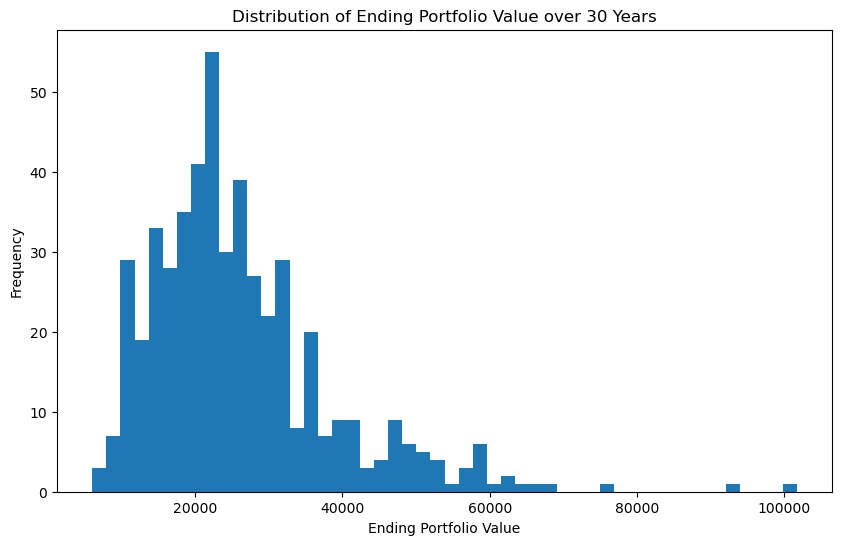

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $10,250.83 and $57,957.26


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns
daily_returns = portfolio_close_prices.pct_change().dropna()

# Display sample data
print(daily_returns.head())

# Simulation parameters
num_simulations = 500
num_trading_days = 252 * 30
initial_investment = 20000

# Portfolio allocation (60% SPY, 40% AGG)
weights = np.array([0.6, 0.40])

# Calculate the mean and standard deviation of daily returns
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

# Pre-allocate space for the simulation DataFrame with zeros
simulation_data = np.zeros((num_trading_days, num_simulations))

for i in range(num_simulations):
    # Generate simulated daily returns using a normal distribution
    simulated_daily_returns = np.random.normal(mean_daily_returns, std_daily_returns, (num_trading_days, len(weights)))
    
    # Adjust simulated daily returns by the portfolio weights
    simulated_daily_returns_weighted = simulated_daily_returns.dot(weights)
    
    # Calculate the cumulative returns
    simulated_cumulative_returns = (1 + simulated_daily_returns_weighted).cumprod()
    
    # Store the simulated cumulative returns
    simulation_data[:, i] = initial_investment * simulated_cumulative_returns

# Convert the simulation data to a DataFrame
simulation_df = pd.DataFrame(simulation_data)

# Display the first few rows of the simulation DataFrame
print(simulation_df.head())

plt.figure(figsize=(10,6))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation of Portfolio Cumulative Returns over 30 Years')
plt.xlabel('Trading Days')
plt.ylabel('Portfolio Value')
plt.show()

# Fetch ending cumulative returns across all simulations
ending_cumulative_returns = simulation_df.iloc[-1, :]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(ending_cumulative_returns, bins=50)
plt.title('Distribution of Ending Portfolio Value over 30 Years')
plt.xlabel('Ending Portfolio Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the 95% confidence interval
ci_lower = ending_cumulative_returns.quantile(0.025)
ci_upper = ending_cumulative_returns.quantile(0.975)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")


symbol                          AGG       SPY
timestamp                                    
2021-02-24 05:00:00+00:00 -0.000346  0.011148
2021-02-25 05:00:00+00:00 -0.009180 -0.024168
2021-02-26 05:00:00+00:00  0.008129 -0.006172
2021-03-01 05:00:00+00:00 -0.002168  0.024789
2021-03-02 05:00:00+00:00  0.000174 -0.007370
            0             1             2             3             4    \
0  20130.598408  20045.740475  19981.708189  19878.512941  19894.967776   
1  20195.911979  20023.585687  20227.969206  19907.889027  19876.727774   
2  20221.115280  20091.371474  20209.821451  19875.428607  19795.697523   
3  20297.338308  20060.029656  20076.041576  19834.625202  19766.425653   
4  20429.929309  20085.794992  19978.468496  19685.212993  19713.318074   

            5             6             7             8             9    ...  \
0  19987.059869  20027.491788  20061.917780  20105.758855  20050.076484  ...   
1  19918.077995  20013.484388  20127.386831  19987.652951  20121.13

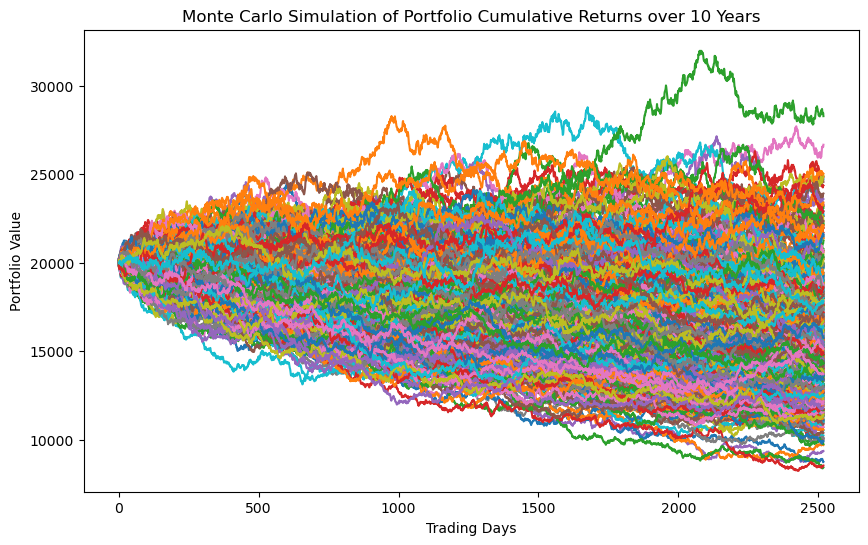

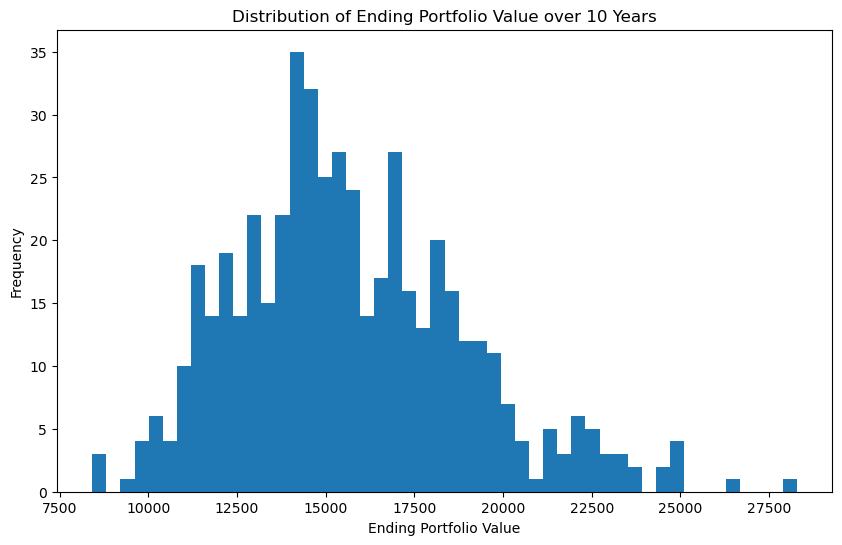

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $10,296.71 and $23,153.52


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns
daily_returns = portfolio_close_prices.pct_change().dropna()

# Display sample data
print(daily_returns.head())

# Simulation parameters
num_simulations = 500
num_trading_days = 252 * 10
initial_investment = 20000

# Portfolio allocation (80% SPY, 20% AGG)
weights = np.array([0.8, 0.2])

# Calculate the mean and standard deviation of daily returns
mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

# Pre-allocate space for the simulation DataFrame with zeros
simulation_data = np.zeros((num_trading_days, num_simulations))

for i in range(num_simulations):
    # Generate simulated daily returns using a normal distribution
    simulated_daily_returns = np.random.normal(mean_daily_returns, std_daily_returns, (num_trading_days, len(weights)))
    
    # Adjust simulated daily returns by the portfolio weights
    simulated_daily_returns_weighted = simulated_daily_returns.dot(weights)
    
    # Calculate the cumulative returns
    simulated_cumulative_returns = (1 + simulated_daily_returns_weighted).cumprod()
    
    # Store the simulated cumulative returns
    simulation_data[:, i] = initial_investment * simulated_cumulative_returns

# Convert the simulation data to a DataFrame
simulation_df = pd.DataFrame(simulation_data)

# Display the first few rows of the simulation DataFrame
print(simulation_df.head())

plt.figure(figsize=(10,6))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation of Portfolio Cumulative Returns over 10 Years')
plt.xlabel('Trading Days')
plt.ylabel('Portfolio Value')
plt.show()

# Fetch ending cumulative returns across all simulations
ending_cumulative_returns = simulation_df.iloc[-1, :]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(ending_cumulative_returns, bins=50)
plt.title('Distribution of Ending Portfolio Value over 10 Years')
plt.xlabel('Ending Portfolio Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the 95% confidence interval
ci_lower = ending_cumulative_returns.quantile(0.025)
ci_upper = ending_cumulative_returns.quantile(0.975)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")